In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [174]:
def prepare_df(results, is_regression=False):
    df_all_cfs = pd.DataFrame()
    for key in results.keys():
        partial_df = results[key]
        partial_df['OriginalIndex'] = key

        df_all_cfs = pd.concat([df_all_cfs, partial_df])
        
    if not is_regression:
        df_all_cfs = df_all_cfs[df_all_cfs['F1']<0.5]
        
    return df_all_cfs.rename(columns={'F1': 'J1', 'F2': 'J2', 'F3': 'J3'})

In [107]:
def plot_boxplot(df, prefix, position=None, alpha=0.1):
    df_plot = df.copy()

    for objective in ['J1', 'J2', 'J3']:
        df_plot[objective] = MinMaxScaler().fit_transform(df_plot[[objective]])
    
    for row in df_plot['Algorithm'].value_counts().iteritems():
        value = f'{row[0]} (n={row[1]})'
        df_plot.loc[df_plot['Algorithm']==row[0], 'Algorithm'] = value

    colors=[-4,2,3]
    colors=colors[:len(df_plot['Algorithm'].unique())]
    
    palette=list(map(sns.color_palette("colorblind").__getitem__, colors))
        
    plt.figure(figsize=(13,4))
    sns.boxplot(data=pd.DataFrame(df_plot, columns=['J1', 'J2', 'J3', 'Algorithm']).melt(id_vars='Algorithm'),
                y='variable', x='value', hue='Algorithm', orient='h',
                palette=palette)
    
    if position is not None:
        plt.legend(loc=position).set_title('Algorithm')
        
    plt.xlabel('Normalized value')
    plt.ylabel("Objective")
    plt.savefig(f'{prefix}_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(13,13))
    sns.pairplot(data=pd.DataFrame(df_plot, columns=['J1', 'J2', 'J3', 'Algorithm']).reset_index(drop=True),
                 hue='Algorithm', plot_kws={'alpha': alpha}, palette=palette)
                 #hue='Algorithm', kind='kde', palette=palette)
    plt.xlabel('Objective')
    plt.ylabel("Objective")
    plt.savefig(f'{prefix}_pairplot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [180]:
def get_stats(df_all_cfs, df_all):
    df_stats = df_all_cfs.copy()
    df_stats['J3'] = df_stats['J3']*df_all.shape[1]
    display(df_stats.groupby('Algorithm')['J1', 'J2', 'J3'].agg(['min', 'max', 'median', 'mean', 'std']).round(4))

In [109]:
sns.set_style("whitegrid")
sns.set_context("notebook")

# Classification

In [115]:
results_adult, df_adult = pickle.load(open('adult_results.pkl', 'rb'))
results_compas, df_compas = pickle.load(open('compas_results.pkl', 'rb'))
results_german, df_german = pickle.load(open('german_results.pkl', 'rb'))

In [116]:
pd.set_option('display.max_rows', None)

In [117]:
df_adult_all_cfs = prepare_df(results_adult)
df_compas_all_cfs = prepare_df(results_compas)
df_german_all_cfs = prepare_df(results_german)

In [166]:
#df_adult_all_cfs[(df_adult_all_cfs['OriginalIndex']==8043) & (df_adult_all_cfs['Algorithm']=='Proposal')]#.sort_values(by='J2')
#df_adult_all_cfs[df_adult_all_cfs['OriginalIndex']==8043].sort_values(by='J2')
#df_german_all_cfs[(df_german_all_cfs['OriginalIndex']==8043) & (df_german_all_cfs['Algorithm']=='Alibi')].sort_values(by='J2')
df_german_all_cfs[(df_german_all_cfs['OriginalIndex']==11) & (df_german_all_cfs['Algorithm']=='Proposal')].shape

(26, 14)

In [142]:
for df in [df_adult_all_cfs, df_compas_all_cfs, df_german_all_cfs]:
    algorithms = []
    for orig_index in df['OriginalIndex'].unique():
        algorithms.extend(df[df['OriginalIndex']==orig_index]['Algorithm'].unique().tolist())

    display(np.unique(algorithms, return_counts=True))

(array(['Alibi', 'DiCE', 'Proposal'], dtype='<U8'),
 array([ 49, 150, 150], dtype=int64))

(array(['DiCE', 'Proposal'], dtype='<U8'), array([150,  89], dtype=int64))

(array(['Alibi', 'DiCE', 'Proposal'], dtype='<U8'),
 array([ 48, 150, 150], dtype=int64))

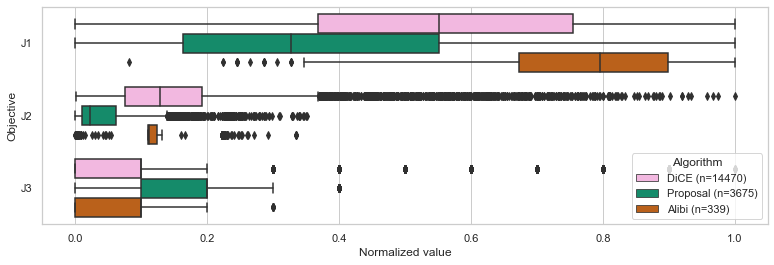

<Figure size 936x936 with 0 Axes>

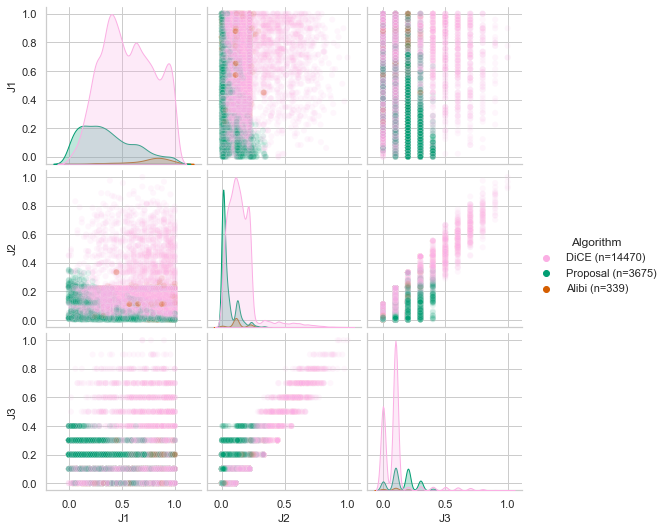

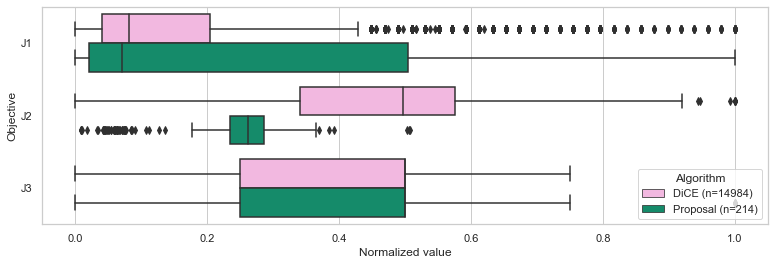

<Figure size 936x936 with 0 Axes>

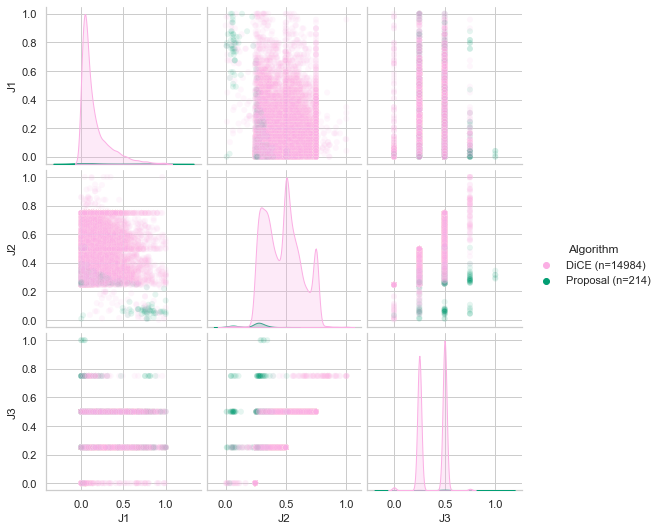

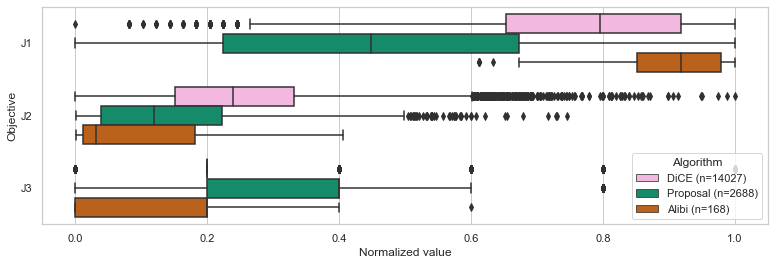

<Figure size 936x936 with 0 Axes>

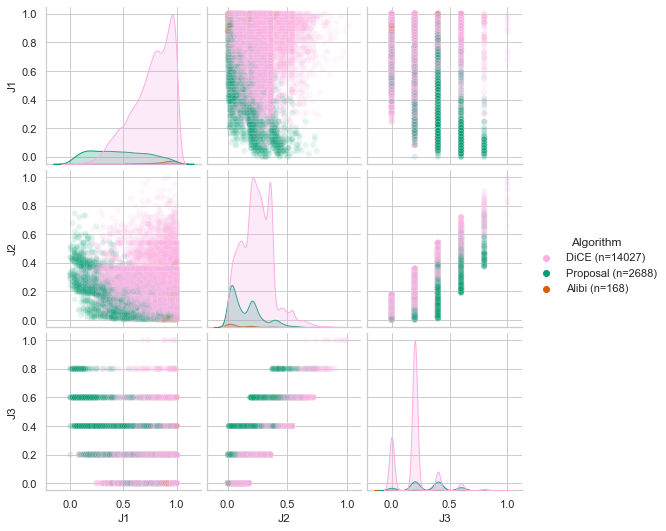

In [122]:
plot_boxplot(df_adult_all_cfs, 'adult', 'lower right')
plot_boxplot(df_compas_all_cfs, 'compas', 'lower right')
plot_boxplot(df_german_all_cfs, 'german', 'lower right')

# Regression

In [171]:
results_cali, df_cali = pickle.load(open('california_results.pkl', 'rb'))
results_abalone, df_abalone = pickle.load(open('abalone_results.pkl', 'rb'))

In [175]:
df_california_all_cfs = prepare_df(results_cali, True)
df_abalone_all_cfs = prepare_df(results_abalone, True)

In [181]:
get_stats(df_california_all_cfs, df_cali)

A:\anaconda3\envs\xmoai\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


J1                                   J2                  \
              min     max  median    mean     std  min     max  median   
Algorithm                                                                
DiCE       0.0002  1.1391  0.7367  0.6801  0.3239  0.0  0.2731  0.0695   
Proposal   0.0000  1.1391  0.1936  0.3153  0.3322  0.0  0.3125  0.0146   

                            J3                              
             mean     std  min  max median    mean     std  
Algorithm                                                   
DiCE       0.0755  0.0483  0.0  3.0    2.0  1.5783  0.5477  
Proposal   0.0207  0.0227  1.0  5.0    3.0  2.9276  1.3346

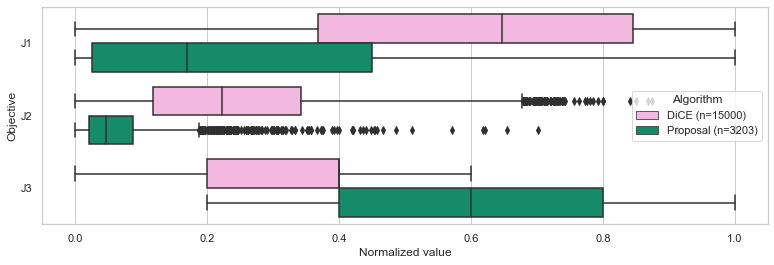

<Figure size 936x936 with 0 Axes>

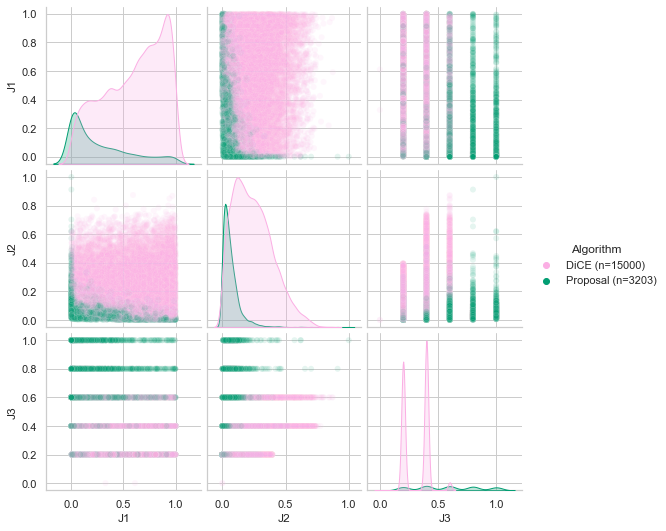

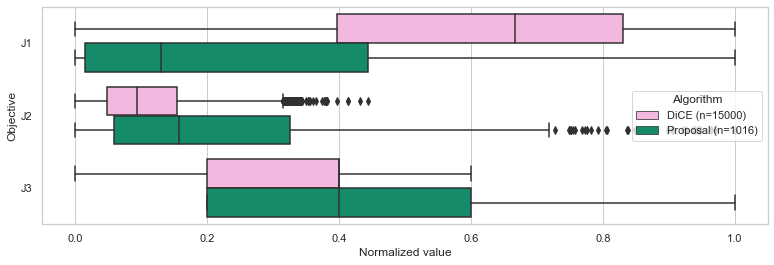

<Figure size 936x936 with 0 Axes>

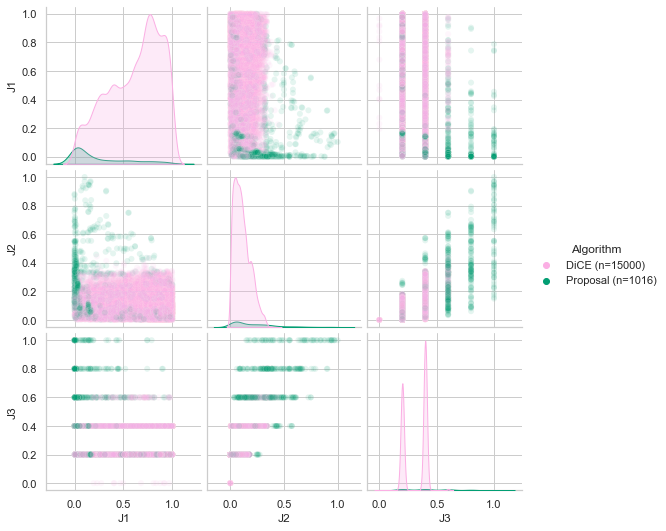

In [182]:
plot_boxplot(df_california_all_cfs, 'california', 'center right')
plot_boxplot(df_abalone_all_cfs, 'abalone', 'center right')